Iremos rodar nosso primeiro exemplo de ML, uma espécie de "Hello world!" da área: a classificação de caracteres mnist.

Primeiro, iremos carregar o keras e o conjunto de dados (dataset) mnist, que já vem disponível no Keras.

In [14]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

Nesse caso, carregar os dados é relativamente fácil: eles já estão pré-processados. Os dados já estão separados em dois conjuntos: um de treinamento, em que iremos treinar o modelo, e um de teste, que deixamos intocável durante o treinamento e usamos no fim para testar o modelo. É importante NUNCA mexer nos dados de teste durante o treinamento e testes na rede.

In [15]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

As camadas da rede podem ser "empilhadas", uma a uma, na arquitetura sequencial. Definimos as camadas simples, uma a uma, definindo o número de nós em cada camada e a função de ativação a ser aplicada em cada camada (em todos os nós da camada).

In [16]:
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

Neste exemplo, temos duas camadas, uma com 512 nós e outra (a de saída) com 10 nós, com cada nó dando a probabilidade da imagem ser de 0 a 9.

Em seguida, compilamos o modelo. Aqui definimos três coisas fundamentais: o otimizador, a função perda e a métrica que iremos avaliar o modelo.

In [17]:
model.compile(optimizer="RMSProp",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

Como o Keras trabalha com vetores, iremos redimensionar nossos dados para uma única dimensão de características, de tamanho 28*28 (28 do eixo x * 28 do y). Como a intensidade máxima dos pixels é 255, normalizamos em relação a esse valor.

In [18]:
train_images.shape

(60000, 28, 28)

In [19]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32") / 255


In [20]:
train_images.shape

(60000, 784)

Por fim, fitamos o modelo. Precisamos dos nossos X (as características, no train_images), nossso valor alvo (train_labels), a quantidade de épocas e o número do batch.

In [21]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8693 - loss: 0.4403
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9664 - loss: 0.1161
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9800 - loss: 0.0721
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9848 - loss: 0.0510
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9888 - loss: 0.0380


Podemos escolher um recorte (os primeiros 10 exemplos) do teste e verificar a previsão do modelo. Verificamos o valor para o primeiro exemplo do conjunto de teste.

In [22]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


array([5.8404108e-08, 2.6773428e-09, 3.2569499e-06, 8.4717787e-05,
       3.6819853e-11, 8.2554683e-09, 3.0587542e-12, 9.9990696e-01,
       2.8014730e-07, 4.6120058e-06], dtype=float32)

Vemos que o modelo prevê uma probabilidade de 0.999959 do caractere em questão ser um 7. Podemos conferir se a previsão está correta vendo a imagem:

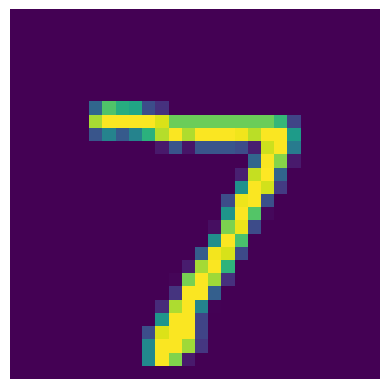

In [25]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.imshow(test_digits[0].reshape(28,28))
plt.axis("off")
plt.show()

Avaliamos a qualidade do modelo pela medida de acurácia no conjunto de teste:

In [23]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9756 - loss: 0.0788
Test accuracy: 0.9787999987602234


Temos uma acurácia de 0.979. Nada mal!